In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [71]:
import tensorflow as tf

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [74]:
import warnings
warnings.filterwarnings('ignore') 

In [75]:
dataset = pd.read_csv("../../data/A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
mnist_data = pd.read_csv("../../data/mnist_train.csv").astype('float32')
mnist_data.rename(columns={'0':'label'}, inplace=True)

In [76]:
mnist_data.iloc[:,0] = mnist_data.iloc[:,0].replace({0.0:26.0, 1.0:27.0, 2.0:28.0, 3.0:29.0, 4.0:30.0, 5.0:31.0, 6.0:32.0, 
                                                    7.0:33.0, 8.0:34.0, 9.0:35.0})

In [77]:
print(dataset.shape[0])

372451


In [78]:
dataset = dataset.append(mnist_data)

In [79]:
print(dataset.shape[0])

432451


In [80]:
X = dataset.drop('label',axis = 1)
y = dataset['label']

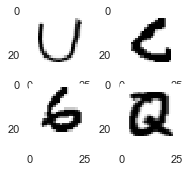

In [81]:
X_shuffle = shuffle(X)

plt.figure(figsize = (3,2.5), frameon=False)
plt.rcParams["axes.grid"] = False
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		X_shuffle.iloc[i].values.reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

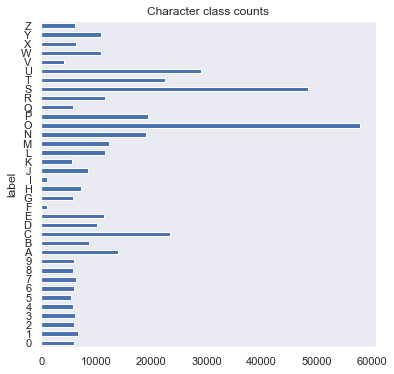

In [82]:
label_mapper = {
	0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'
    ,26:'0', 27:'1', 28:'2', 29:'3', 30:'4', 31:'5', 32:'6', 33:'7', 34:'8', 35:'9'}
dataset['label'] = dataset['label'].map(label_mapper)
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(6,6))

plt.title("Character class counts")
plt.show()

In [83]:
# split data+labels
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [84]:
print(X_train.shape[0], X_test.shape[0])

324338 108113


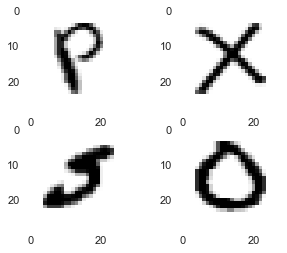

In [85]:
X_shuffle = shuffle(X_train)

plt.figure(figsize = (5, 4), frameon=False)
plt.rcParams["axes.grid"] = False
plt.axis('off')
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		X_shuffle[i].reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

In [86]:
# reshaping 1D array to 2D: 784 = 28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [87]:
#define model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

In [88]:
# compile model

model.compile(
	loss='categorical_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                                 
 dense_5 (Dense)             (None, 36)                4644      
                                                      

In [89]:
history = model.fit(
	X_train, y_train,
	validation_data=(X_test, y_test),
	epochs=5, batch_size=200, verbose=2
)

Epoch 1/5
1622/1622 - 150s - loss: 0.2877 - accuracy: 0.9213 - val_loss: 0.1307 - val_accuracy: 0.9635 - 150s/epoch - 92ms/step
Epoch 2/5
1622/1622 - 138s - loss: 0.1238 - accuracy: 0.9648 - val_loss: 0.1020 - val_accuracy: 0.9714 - 138s/epoch - 85ms/step
Epoch 3/5
1622/1622 - 133s - loss: 0.0983 - accuracy: 0.9720 - val_loss: 0.0907 - val_accuracy: 0.9748 - 133s/epoch - 82ms/step
Epoch 4/5
1622/1622 - 137s - loss: 0.0822 - accuracy: 0.9760 - val_loss: 0.0824 - val_accuracy: 0.9766 - 137s/epoch - 84ms/step
Epoch 5/5
1622/1622 - 134s - loss: 0.0708 - accuracy: 0.9788 - val_loss: 0.0735 - val_accuracy: 0.9794 - 134s/epoch - 83ms/step


In [90]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN model Score: ", scores[1])

CNN model Score:  0.9794289469718933


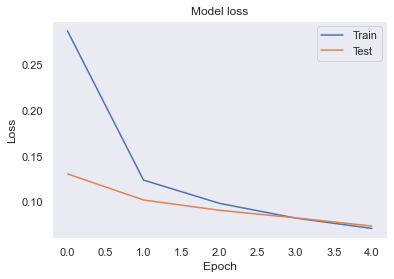

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [92]:
pred = model.predict(X_test)

3379/3379 [==============================] - 27s 8ms/step


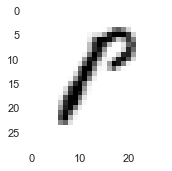

In [93]:
sample_test = X_test[12].reshape(28, 28)

plt.figure(figsize = (3,2.5), frameon=False)
plt.rcParams["axes.grid"] = False
plt.imshow(
	sample_test,
	interpolation='nearest',
	cmap='Greys'
)
plt.show()

In [94]:
label_mapper[pred[12].argmax()]

'P'

<AxesSubplot:>

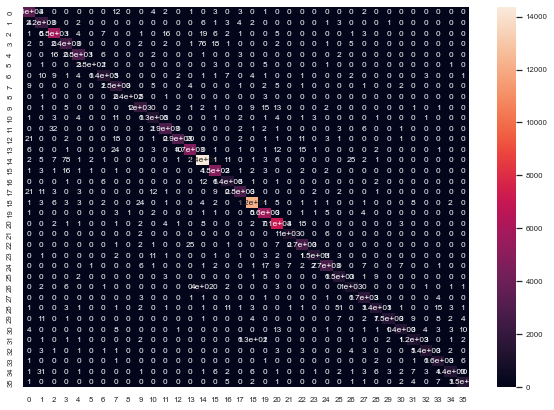

In [95]:
cm = confusion_matrix(
	y_test.argmax(axis=1),
	pred.argmax(axis=1)
)
df_cm = pd.DataFrame(
	cm, range(36), range(36)
)
plt.figure(figsize = (10,7))
sns.set_theme(font_scale=0.7)
sns.heatmap(df_cm, annot=True)

In [96]:
model.save('char&mnist_recog.h5')